In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [41]:
# space-derivative approximation functions
def right_1(U, h):
    return (U[1:] - U[:-1]) / h, 1, None
def right_2(U, h):
    return (U[0:-2] - 4 * U[1:-1] + 3 * U[2:]) / h / 2., 2, None
def central_2(U, h):
    return (U[2:] - U[:-2]) / 2. / h, 1, -1
def central_4(U, h):
    return (U[:-4] - U[4:] + 8. * (U[3:-1] - U[1:-3])) / 12. / h, 2, -2
def central_6(U, h):
    return (U[6:] - U[:-6] + 9. * (U[1:-5] - U[5:-1]) + 45. * (U[4:-2] - U[2:-4])) / 60. / h, 3, -3

In [71]:
# time-derivative approximation functions
def upwind(U, h, c, r, Deriv):
    dt = r * h
    temp, idx_l, idx_r = Deriv(U, h)
    U_n = U[idx_l:idx_r] - c * dt * temp
    return U_n, dt, idx_l, idx_r
def heun(U, h, c, r, Deriv):
    dt = r * h ** 2
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = U[idx_l:idx_r] - c * dt * temp1 / 3.
    temp2, idx_l, idx_r= Deriv(k1, h)
    k2[idx_l:idx_r] = U[idx_l:idx_r] - 2. * c * dt * temp2 / 3.
    temp3, idx_l, idx_r = Deriv(k2, h)
    return 0.25 * U[idx_l:idx_r] + 0.75 * k1[idx_l:idx_r] - 0.75 * c * dt * temp3, dt, idx_l, idx_r
def runge_kutta_2(U, h, c, r, Deriv):
    dt = r * h
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = -temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1, h)
    k2[idx_l:idx_r] = -temp2
    return U + 0.5 * c * dt * k1 + 0.5 * c * dt * k2, dt, 0, None
def runge_kutta_3(U, h, c, r, Deriv):
    dt = r * h
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    k3 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = -temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1 / 3., h)
    k2[idx_l:idx_r] = -temp2
    temp3, idx_l, idx_r = Deriv(U + 2. * c * dt * k2 / 3., h)
    k3[idx_l:idx_r] = -temp3
    return U + 0.25 * c * dt * k1 + 0.75 * c * dt * k3, dt, 0, None
def runge_kutta_4(U, h, c, r, Deriv):
    dt = r * h
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    k3 = np.zeros_like(U)
    k4 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = -temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1 / 2., h)
    k2[idx_l:idx_r] = -temp2
    temp3, idx_l, idx_r = Deriv(U + c * dt * k2 / 2., h)
    k3[idx_l:idx_r] = -temp3
    temp4, idx_l, idx_r = Deriv(U + c * dt * k3, h)
    k4[idx_l:idx_r] = -temp4
    return U + c * dt * k1 / 6. + c * dt * k2 / 3. + c * dt * k3 / 3. + c * dt * k4 / 6., dt, 0, None
def runge_kutta_5(U, h, c, r, Deriv):
    dt = r * h
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    k3 = np.zeros_like(U)
    k4 = np.zeros_like(U)
    k5 = np.zeros_like(U)
    k6 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = -temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1 / 4., h)
    k2[idx_l:idx_r] = -temp2
    temp3, idx_l, idx_r = Deriv(U + c * dt * k1 / 8. + c * dt * k2 / 8., h)
    k3[idx_l:idx_r] = -temp3
    temp4, idx_l, idx_r = Deriv(U + c * dt * k3 / 2., h)
    k4[idx_l:idx_r] = -temp4
    temp5, idx_l, idx_r = Deriv(U + 3. * c * dt * k1 / 16. - 3. * c * dt * k2 / 8. + 3. * c * dt * k3 / 8. + 9. * c * dt * k4 / 16., h)
    k5[idx_l:idx_r] = -temp5
    temp6, idx_l, idx_r = Deriv(U - 3. * c * dt * k1 / 7. + 8. * c * dt * k2 / 7. + 6. * c * dt * k3 / 7. - 12. * c * dt * k4 / 7. + 8. * c * dt * k5 / 7., h)
    k6[idx_l:idx_r] = -temp6
    return U + 7. * c * dt * k1 / 90. + 16. * c * dt * k3 / 45. + 2. * c * dt * k4 / 15. + 16. * c * dt * k5 / 45. + 7. * c * dt * k6 / 90., dt, 0, None
def runge_kutta_7(U, h, c, r, Deriv):
    dt = r * h
    k1 = np.zeros_like(U)
    k2 = np.zeros_like(U)
    k3 = np.zeros_like(U)
    k4 = np.zeros_like(U)
    k5 = np.zeros_like(U)
    k6 = np.zeros_like(U)
    k7 = np.zeros_like(U)
    k8 = np.zeros_like(U)
    k9 = np.zeros_like(U)
    temp1, idx_l, idx_r = Deriv(U, h)
    k1[idx_l:idx_r] = -temp1
    temp2, idx_l, idx_r = Deriv(U + c * dt * k1  / 6.0, h)
    k2[idx_l:idx_r] = -temp2
    temp3, idx_l, idx_r = Deriv(U + c * dt * k2  / 3.0, h)
    k3[idx_l:idx_r] = -temp3
    temp4, idx_l, idx_r = Deriv(U + c * dt * k1  / 8.0 + c * dt * k3 * 3.0  / 8.0, h)
    k4[idx_l:idx_r] = -temp4
    temp5, idx_l, idx_r = Deriv(U + c * dt * k1 * 148.0  / 1331.0 + c * dt * k3 * 150.0  / 1331.0 - c * dt * k4 * 56.0  / 1331.0, h)
    k5[idx_l:idx_r] = -temp5
    temp6, idx_l, idx_r = Deriv(U - c * dt * k1 * 404.0  / 243.0 - c * dt * k3 * 170.0  / 27.0 + c * dt * k4 * 4024.0  / 1701.0 + c * dt * k5 * 10648.0  / 1701.0, h)
    k6[idx_l:idx_r] = -temp6
    temp7, idx_l, idx_r = Deriv(U + c * dt * k1 * 2466.0  / 2401.0 + c * dt * k3 * 1242.0  / 343.0 - c * dt * k4 * 19176.0  / 16807.0 - c * dt * k5 * 51909.0  / 16807.0 + c * dt * k6 * 1053.0  / 2401.0, h)
    k7[idx_l:idx_r] = -temp7
    temp8, idx_l, idx_r = Deriv(U + c * dt * k1 * 5.0  / 154.0 + c * dt * k4 * 96.0  / 539.0 - c * dt * k5 * 1815.0  / 20384.0 - c * dt * k6 * 405.0  / 2464.0 + c * dt * k7 * 49.0  / 1144.0, h)
    k8[idx_l:idx_r] = -temp8
    temp9, idx_l, idx_r = Deriv(U - c * dt * k1 * 113.0  / 32.0 - c * dt * k3 * 195.0  / 22.0 + c * dt * k4 * 32.0  / 7.0 + c * dt * k5 * 29403.0  / 3584.0 - c * dt * k6 * 729.0  / 512.0 + c * dt * k7 * 1029.0  / 1408.0 + c * dt * k8 * 21.0  / 16.0, h)
    k9[idx_l:idx_r] = -temp9
    return U + c * dt * k4 * 32.0  / 105.0 + c * dt * k5 * 1771561.0  / 6289920.0 + c * dt * k6 * 243.0  / 2560.0 + c * dt * k7 * 16807.0  / 74880.0 + c * dt * k8 * 77.0  / 1440.0 + c * dt * k9 * 11.0  / 270.0, dt, 0, None

In [138]:
class Solver:
    def __init__(self, h, c, L, r, T = 100., pw = 6):
        self.h = h
        self.c = c
        self.L = L
        self.r = r
        self.T = T
        self.Nx = int(L / h)
        self.pw = pw
        self.U = np.zeros(self.Nx)
        self.U_ex = np.zeros(self.Nx)
    def initial(self):
        x0 = int(self.Nx / 2) - int(20 / self.h)
        x1 = x0 + int(40 / self.h)
        x = np.linspace(0, self.L, self.Nx)
        self.U[x0:x1] = np.abs(np.sin((x[x0:x1] - x[x0]) * np.pi / (x[x1] - x[x0])) ** self.pw)
        cTh = int(self.c * self.T / self.h)
        self.U_ex[x0 + cTh:x1 + cTh] = np.abs(np.sin((x[x0 + cTh:x1 + cTh] - x[x0 + cTh]) * np.pi / (x[x1 + cTh] - x[x0 + cTh])) ** self.pw)
    def solve(self, F, Deriv):
        #U = F(U, h, c, r)
        t = 0
        while t < self.T:
            temp, dt, idx_l, idx_r = F(self.U, self.h, self.c, self.r, Deriv)
            self.U[idx_l : idx_r] = temp
            t += dt
    def error(self):
        x0 = int(self.Nx / 2) - int(20 / self.h)
        x1 = x0 + int(40 / self.h)
        cTh = int(self.c * self.T / self.h)
        return np.sqrt(np.sum((self.U[x0 + cTh: x1 + cTh] - self.U_ex[x0 + cTh: x1 + cTh]) ** 2 * self.h))
    def draw(self, axs, ylabel = 'exact'):
        x = np.linspace(0, self.L, self.Nx)
        x0 = int(self.Nx / 2) - int(20 / self.h)
        x1 = x0 + int(40 / self.h)
        cTh = int(self.c * self.T / self.h)
        axs.plot(x[x0 + cTh - 100: x1 + cTh + 100], self.U[x0 + cTh - 100: x1 + cTh + 100], label = 'h = ' + str(self.h));
        axs.plot(x[x0 + cTh - 100: x1 + cTh + 100], self.U_ex[x0 + cTh - 100: x1 + cTh + 100], '--', label = ylabel);
        axs.set_xlabel('x')
        axs.set_ylabel('y')
        axs.grid()
        axs.legend()

In [76]:
def init_H_as_power_of_2(n):
    H = np.array([2 ** -i for i in range(n)])
    return H

In [6]:
def least_squares_linear(x, y):
    # y = a * x + b
    n = x.size
    sx2 = np.sum(x ** 2)
    sx = np.sum(x)
    sy = np.sum(y)
    sxy = np.sum(x * y)
    d = n * sx2 - sx * sx
    da = n * sxy - sx * sy
    db = sx2 * sy - sx * sxy
    return da / d, db / d

In [136]:
def make_error_packs(H, c, L, r, deriv_t, deriv_x, T = 100., pw = 6, draw = False):
    N = len(H)
    #dt_size, dx_size = len(deriv_t), len(deriv_x)
    err_pack = []
    if draw: fig, axs = plt.subplots(N, 1, figsize = (10, 8))
    for dt in deriv_t:
        for dx in deriv_x:
            errs = np.zeros(N)
            for i, h in enumerate(H):
                solver = Solver(h, c, L, r, T, pw)
                solver.initial()
                solver.solve(dt, dx)
                errs[i] = solver.error()
                ylabel = str(dt).split(' ')[1] + '+' + str(dx).split(' ')[1]
                if draw: solver.draw(axs[i], ylabel)
            err_pack.append(errs)
    return err_pack

In [92]:
def plot_errors(H, errs_packs):
    plt.figure(figsize = (10, 10))
    plt.grid()
    plt.title('Errors')
    plt.xlabel('ln(h)')
    plt.ylabel('ln(err)')
    for err in errs_packs:
        a, b = least_squares_linear(np.log(H), np.log(err))
        plt.scatter(np.log(H), np.log(err), label = 'order = ' + str(a));
        plt.plot(np.log(H), a * np.log(H) + b, '--', color = 'black')
        plt.legend()
        #print(np.log(err[-2] / err[-1]) / np.log(2.))


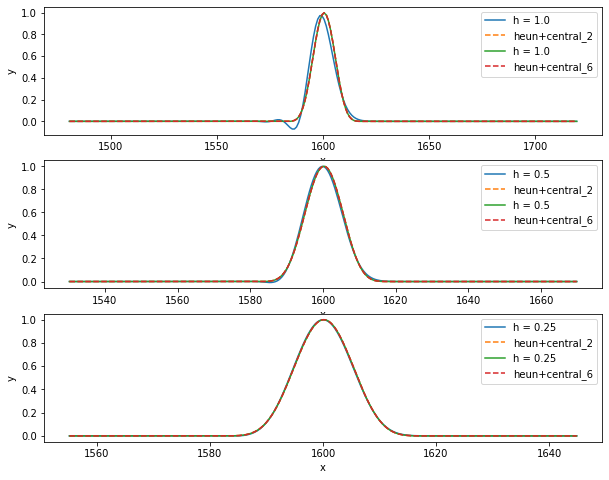

In [149]:
c = 1. 
L = 3000
r = .5
H = [1., 0.5, 0.25]
err_packs = make_error_packs(H, c, L, r, [heun], [central_2, central_6], draw = True)

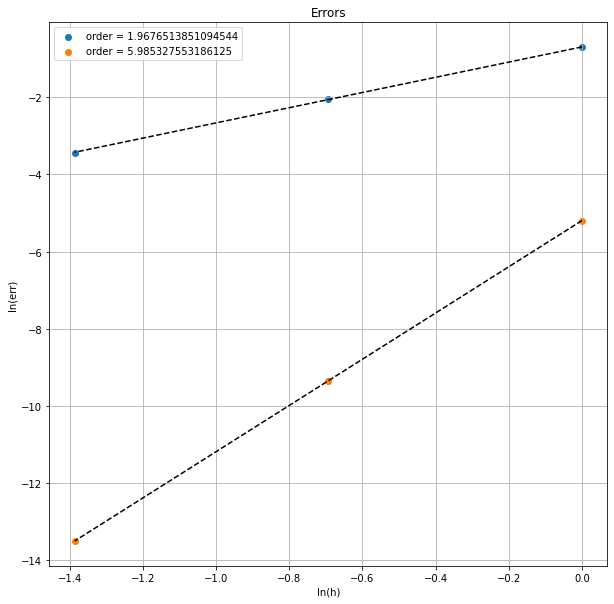

In [150]:
plot_errors(H, err_packs)